In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
DATADIR=r"C:\Users\DELL\Downloads\kagglecatsanddogs_3367a\PetImages"
CATEGORIES=["Dog","Cat"]

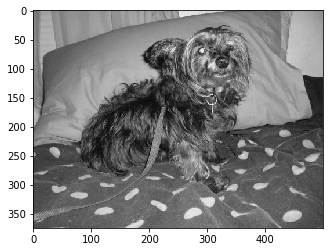

In [5]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to cat or dog directory
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        #path to final image, then change to grayscale since color is not important in differneciating cats and dogs
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [6]:
img_array

array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

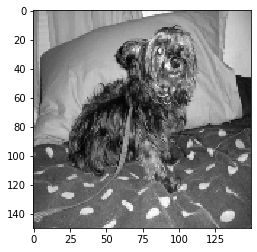

In [7]:
img_size=150

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to cat or dog directory
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
                #path to final image, then change to grayscale since color is not important in differneciating cats and dogs
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    

In [9]:
create_training_data()

In [10]:
print(len(training_data))

17872


In [11]:
import random
random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
0
0
0
0
0


In [13]:
X=[]
y=[]

In [14]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,1)
#here -1 is indicates that the dimention is unknown to us and reshape automatically finds it without us having to specify it
#1 for grascale

In [15]:
np.save('features.npy',X) #saving
X=np.load('features.npy')#loading

np.save('labels.npy',y)
y=np.load('labels.npy')

In [16]:
X[1]

array([[[22],
        [34],
        [71],
        ...,
        [21],
        [19],
        [20]],

       [[21],
        [35],
        [73],
        ...,
        [21],
        [20],
        [18]],

       [[19],
        [35],
        [74],
        ...,
        [21],
        [21],
        [20]],

       ...,

       [[70],
        [71],
        [71],
        ...,
        [36],
        [31],
        [34]],

       [[69],
        [68],
        [70],
        ...,
        [34],
        [33],
        [32]],

       [[65],
        [69],
        [69],
        ...,
        [31],
        [34],
        [31]]], dtype=uint8)

In [18]:
y[2]

1